In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [27]:
DATA_WRITE_FILE = "./data_google.txt"
google_cse_df = pd.read_csv(DATA_WRITE_FILE).iloc[1:, :-1].set_index("LICENSE TYPE")
google_cse_df.head(5)

,No Priori,Australia,Brazil,Canada,Egypt,Germany,India,Japan,Spain,United Kingdom,United States,Arabic,Chinese (Simplified),Chinese (Traditional),English,French,Indonesian,Portuguese,Spanish
LICENSE TYPE,,,,,,,,,,,,,,,,,,,
licenses/GPL/2.0/,66500,88,307,72,2,4010,23,106,969,1010,37200,758,429,139,51500,2370,127,1410,3510
licenses/by-nc-nd/2.0/,19000000,11500,4150,5530,262,57300,3530,9180,14000,64300,10100000,1370,3890,384,22400000,105000,3410,22100,68500
licenses/by-nc-nd/2.5/,26800000,17800,4680,16500,316,53800,4700,10300,16100,70300,14900000,527,3110,497,26400000,55600,1430,16400,166000
licenses/by-nc-nd/3.0/,29400000,23300,15500,7270,901,71600,4510,25400,22900,65800,14200000,1650,5920,1140,23500000,180000,3540,141000,148000
licenses/by-nc-nd/4.0/,75200000,28200,33400,22000,683,185000,15700,54600,39700,189000,50300000,2530,15600,6100,77900000,286000,20300,95800,252000


In [62]:
license_cat = pd.Series(google_cse_df.index).str.extract(
    r"(.+)/.+/",
    expand = False
).fillna("all")
license_cat.index = google_cse_df.index
license_ver = pd.Series(google_cse_df.index).str.extract(
    r"/(\d\.\d)/",
    expand = False
)
license_ver.index = google_cse_df.index
license_df = pd.DataFrame(
    index = google_cse_df.index,
    data = {"LICENSE CATEGORY": license_cat, "LICENSE VERSION": license_ver}
)
license_df.head(5)

,LICENSE CATEGORY,LICENSE VERSION
LICENSE TYPE,,
licenses/GPL/2.0/,licenses/GPL,2.0
licenses/by-nc-nd/2.0/,licenses/by-nc-nd,2.0
licenses/by-nc-nd/2.5/,licenses/by-nc-nd,2.5
licenses/by-nc-nd/3.0/,licenses/by-nc-nd,3.0
licenses/by-nc-nd/4.0/,licenses/by-nc-nd,4.0


In [78]:
google_cse_lic_mapped = google_cse_df.merge(license_df, left_index = True, right_index = True)
google_cse_lic_mapped

,No Priori,Australia,Brazil,Canada,Egypt,Germany,India,Japan,Spain,United Kingdom,...,Arabic,Chinese (Simplified),Chinese (Traditional),English,French,Indonesian,Portuguese,Spanish,LICENSE CATEGORY,LICENSE VERSION
LICENSE TYPE,,,,,,,,,,,,,,,,,,,,,
licenses/GPL/2.0/,66500,88,307,72,2,4010,23,106,969,1010,...,758,429,139,51500,2370,127,1410,3510,licenses/GPL,2.0
licenses/by-nc-nd/2.0/,19000000,11500,4150,5530,262,57300,3530,9180,14000,64300,...,1370,3890,384,22400000,105000,3410,22100,68500,licenses/by-nc-nd,2.0
licenses/by-nc-nd/2.5/,26800000,17800,4680,16500,316,53800,4700,10300,16100,70300,...,527,3110,497,26400000,55600,1430,16400,166000,licenses/by-nc-nd,2.5
licenses/by-nc-nd/3.0/,29400000,23300,15500,7270,901,71600,4510,25400,22900,65800,...,1650,5920,1140,23500000,180000,3540,141000,148000,licenses/by-nc-nd,3.0
licenses/by-nc-nd/4.0/,75200000,28200,33400,22000,683,185000,15700,54600,39700,189000,...,2530,15600,6100,77900000,286000,20300,95800,252000,licenses/by-nc-nd,4.0
licenses/by-nc-sa/1.0/,4240000,7100,3760,2290,84,29400,1080,3120,6070,24300,...,284,3750,91,3880000,53800,1880,15200,13500,licenses/by-nc-sa,1.0
licenses/by-nc-sa/2.0/,2570000,6090,2680,2840,105,31200,1550,3310,8510,26600,...,394,2200,248,1350000,89300,1930,23900,37600,licenses/by-nc-sa,2.0
licenses/by-nc-sa/2.5/,8120000,8730,3390,7210,140,26800,1910,2970,8610,36100,...,211,1400,136,6810000,50700,668,16500,105000,licenses/by-nc-sa,2.5
licenses/by-nc-sa/3.0/,6060000,10200,6040,3730,477,48000,2340,3820,9900,35500,...,1470,4050,539,3550000,155000,1610,135000,128000,licenses/by-nc-sa,3.0


In [79]:
google_cse_lic_type_sum = google_cse_lic_mapped.groupby("LICENSE CATEGORY").agg(np.sum)
google_cse_lic_type_sum.loc['Total'] = google_cse_lic_type_sum.sum()
google_cse_lic_type_sum

,No Priori,Australia,Brazil,Canada,Egypt,Germany,India,Japan,Spain,United Kingdom,United States,Arabic,Chinese (Simplified),Chinese (Traditional),English,French,Indonesian,Portuguese,Spanish
LICENSE CATEGORY,,,,,,,,,,,,,,,,,,,
licenses/GPL,66500,88,307,72,2,4010,23,106,969,1010,37200,758,429,139,51500,2370,127,1410,3510
licenses/by,577100000,316000,271580,111680,27245,5925000,104840,212500,218500,1217000,471900000,82640,238500,91800,555400000,5359400,232470,1197600,15808100
licenses/by-nc,174900000,88670,201170,54700,2305,434000,29220,110400,105000,460600,104890000,7184,35240,10597,164900000,656600,35060,366400,1058000
licenses/by-nc-nd,174500000,98300,62630,56560,2496,435100,30240,116180,108400,453400,104700000,6513,35370,8766,174300000,673900,30650,292200,676200
licenses/by-nc-sa,61100000,54220,26790,25970,1391,221100,12670,33650,59790,215400,19767000,3356,19930,1678,51560000,647200,18288,289900,524600
licenses/by-nd,501200000,320700,124500,100930,20649,2477000,101000,188500,200800,1177000,398600000,65890,208300,71340,509300000,609700,200560,674800,2089000
licenses/by-nd-nc,25400000,12400,4100,4720,119,61500,2770,12100,11800,57500,17300000,604,6380,330,23400000,42900,3570,12700,21700
licenses/by-sa,244900000,125600,45880,45720,6071,1798500,35960,53400,102400,372000,189500000,44670,131700,39180,221500000,833300,95430,663000,3808200
licenses/sampling+,52600000,20800,4600,8310,157,171000,4480,8590,8870,101000,45200000,306,2460,53,56600000,6920,2160,4980,12900


Text(0.5, 1.0, 'Count of Creative Commons Attributed Webpages on Google,\n by Country and Language (2022, Sept.)')

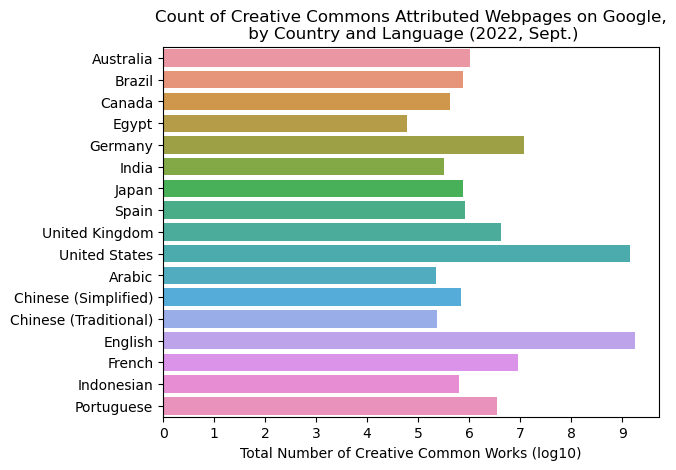

In [73]:
google_cse_totals_by_cl = pd.Series(data = google_cse_lic_type_sum.iloc[-1, 1:-1], index = google_cse_lic_type_sum.columns[1:-1])

plt.xticks(
    np.arange(
        0, max(np.log10(google_cse_totals_by_cl)) + 1
    )
)
sns.barplot(x = np.log10(google_cse_totals_by_cl), y = google_cse_totals_by_cl.index)
plt.xlabel("Total Number of Creative Common Works (log10)")
plt.title("Count of Creative Commons Attributed Webpages on Google,\n by Country and Language (2022, Sept.)")

Text(0.5, 1.0, 'Count of Creative Commons Attributed Webpages on Google,\n by License Type and Version (2022, Sept.)')

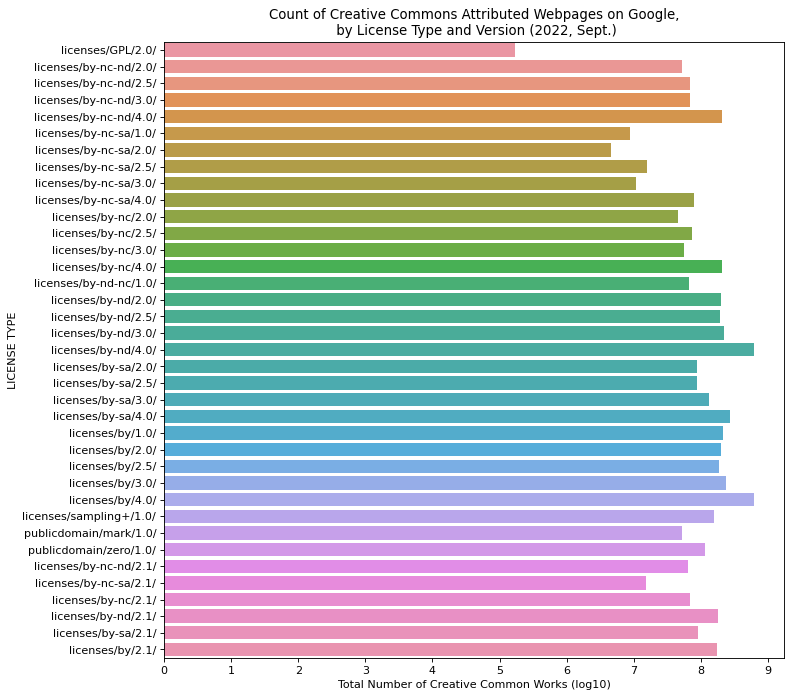

In [74]:
google_cse_totals_by_lic = pd.Series(data = google_cse_df.sum(axis = 1), index = google_cse_df.index)
plt.figure(figsize=(10, 10), dpi=80)
plt.xticks(
    np.arange(
        0, max(np.log10(google_cse_totals_by_lic)) + 1
    )
)
sns.barplot(x = np.log10(google_cse_totals_by_lic), y = google_cse_totals_by_lic.index)
plt.xlabel("Total Number of Creative Common Works (log10)")
plt.title("Count of Creative Commons Attributed Webpages on Google,\n by License Type and Version (2022, Sept.)")

Text(0.5, 1.0, 'Count of Creative Commons Attributed Webpages on Google,\n by License Category (2022, Sept.)')

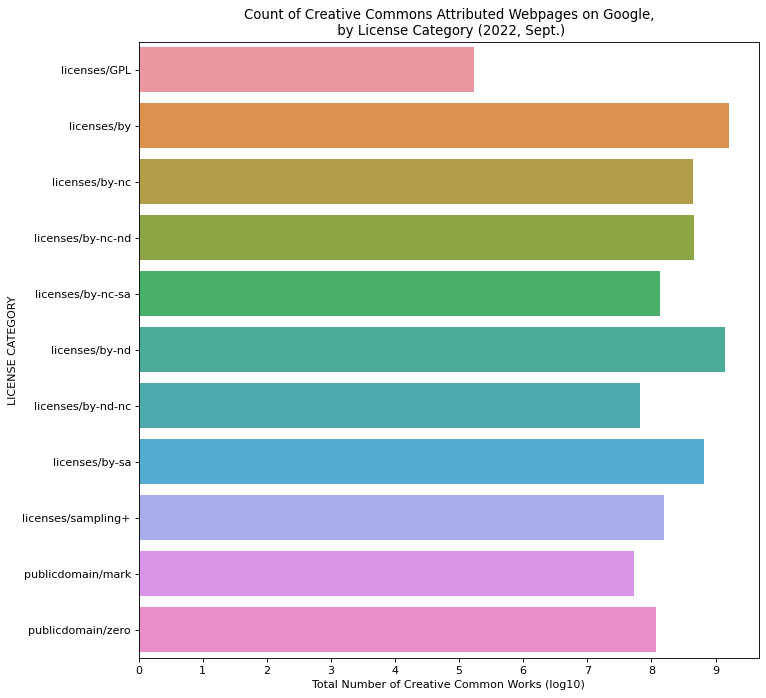

In [81]:
lic_cat_no_total = google_cse_lic_type_sum.drop("Total")
google_cse_totals_lic_cat = pd.Series(data = lic_cat_no_total.sum(axis = 1), index = lic_cat_no_total.index)
plt.figure(figsize=(10, 10), dpi=80)
plt.xticks(
    np.arange(
        0, max(np.log10(google_cse_totals_lic_cat)) + 1
    )
)
sns.barplot(x = np.log10(google_cse_totals_lic_cat), y = google_cse_totals_lic_cat.index)
plt.xlabel("Total Number of Creative Common Works (log10)")
plt.title("Count of Creative Commons Attributed Webpages on Google,\n by License Category (2022, Sept.)")

In [82]:
google_cse_lic_ver_sum = google_cse_lic_mapped.groupby("LICENSE VERSION").agg(np.sum)
google_cse_lic_ver_sum.loc['Total'] = google_cse_lic_ver_sum.sum()
google_cse_lic_ver_sum

,No Priori,Australia,Brazil,Canada,Egypt,Germany,India,Japan,Spain,United Kingdom,United States,Arabic,Chinese (Simplified),Chinese (Traditional),English,French,Indonesian,Portuguese,Spanish
LICENSE VERSION,,,,,,,,,,,,,,,,,,,
1.0,213840000,89350,26210,35620,1006,676000,17966,51860,48580,398600,176807000,18004,49990,15444,217280000,339720,27130,112680,352300
2.0,218836500,109348,38937,46812,4011,1041210,42573,67266,121779,509810,154594200,27302,45269,20890,210401500,673170,76067,297210,918910
2.1,224910000,154000,38090,35200,2242,571500,26130,96230,108100,533700,138911000,11469,57600,8265,224570000,262600,23540,128400,380200
2.5,235620000,188730,41280,93630,2883,563600,37170,62900,98010,543700,166924000,17906,40570,15993,221410000,393900,25358,151500,1255000
3.0,258260000,199600,188240,60150,20904,1984200,58860,142620,159000,527600,205358000,83540,319350,68319,231750000,5458000,157740,1754000,13990000
4.0,718900000,311900,411750,145550,29398,6881800,140760,326200,286200,1617300,561400000,64970,186530,105892,710200000,1847000,316500,1109600,7277000
Total,1870366500,1052928,744507,416962,60444,11718310,323459,747076,821669,4130710,1403994200,223191,699309,234803,1815611500,8974390,626335,3553390,24173410


Text(0.5, 1.0, 'Count of Creative Commons Attributed Webpages on Google,\n by License Category (2022, Sept.)')

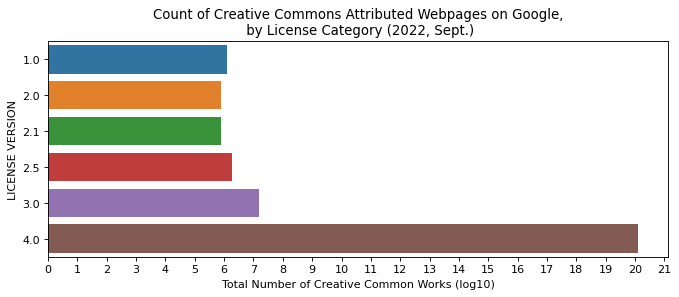

In [87]:
lic_ver_no_total = google_cse_lic_ver_sum.drop("Total")
google_cse_totals_lic_ver = pd.Series(data = lic_ver_no_total.sum(axis = 1), index = lic_ver_no_total.index)
plt.figure(figsize=(10, 3.5), dpi=80)
plt.xticks(
    np.arange(
        0, max(google_cse_totals_lic_ver / (10 ** 8)) + 1
    )
)
sns.barplot(x = google_cse_totals_lic_ver / (10 ** 8), y = google_cse_totals_lic_ver.index)
plt.xlabel("Total Number of Creative Common Works (log10)")
plt.title("Count of Creative Commons Attributed Webpages on Google,\n by License Category (2022, Sept.)")